In [44]:
import numpy as np
import pydotplus
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

%matplotlib inline

In [49]:
gcd = np.genfromtxt('gcd')
gcd = pd.DataFrame(gcd)
gcd

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,6.0,4.0,12.0,5.0,5.0,3.0,4.0,1.0,67.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2.0,48.0,2.0,60.0,1.0,3.0,2.0,2.0,1.0,22.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
2,4.0,12.0,4.0,21.0,1.0,4.0,3.0,3.0,1.0,49.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,42.0,2.0,79.0,1.0,4.0,3.0,4.0,2.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,24.0,3.0,49.0,1.0,3.0,3.0,4.0,4.0,53.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
5,4.0,36.0,2.0,91.0,5.0,3.0,3.0,4.0,4.0,35.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,4.0,24.0,2.0,28.0,3.0,5.0,3.0,4.0,2.0,53.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,2.0,36.0,2.0,69.0,1.0,3.0,3.0,2.0,3.0,35.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,4.0,12.0,2.0,31.0,4.0,4.0,1.0,4.0,1.0,61.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,2.0,30.0,4.0,52.0,1.0,1.0,4.0,2.0,3.0,28.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


In [46]:
train_data, test_data, train_target, test_target = train_test_split(gcd.iloc[:, :-1], gcd.iloc[:, -1],
                                                                    test_size = 0.2)

In [51]:
total = []
train = []
grid = np.arange(1, 71)
for k in grid:
    model = tree.DecisionTreeClassifier(max_depth=k) 
    model.fit(train_data, train_target)
    train.append(f1_score(model.predict(train_data), train_target))
    total.append(model_selection.cross_val_score(model, gcd.iloc[:, :-1], gcd.iloc[:, -1], scoring='f1', cv=5).mean())

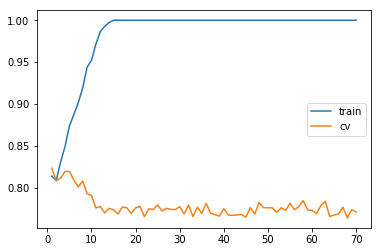

In [56]:
plt.plot(grid, train, label='train')
plt.plot(grid, total, label='cv')
plt.legend(loc='best')
plt.show()

In [7]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                                filled=True, rounded=True,  
                                special_characters=True)  

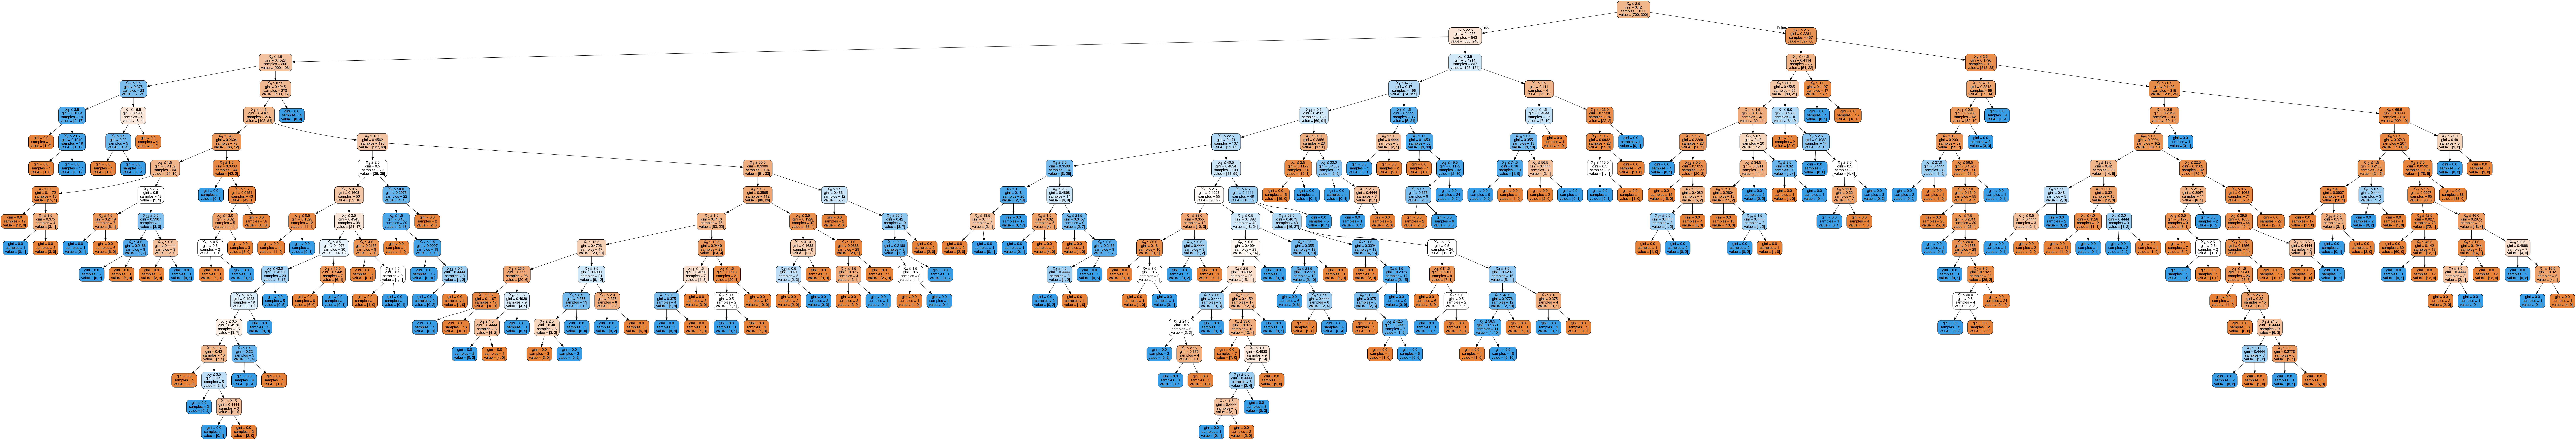

In [8]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

Первые несколько разбиений идут по признакам, которые вполне разумны для решения о выдаче кредита - состояние счета не текущий момент; есть ли у клиента недвижимость\работа и какой промежуток времени; есть ли поручители; размер кредита.